## PHYS249 Lab 9: Ray Tracing

For question 1, I have filled in parts a), b) and c) - read these and then fill in d) e), f) and g).

### 1) Modelling Reflection off a Spherical Mirror

In your 1st-year Physics lab, to understand the properties of optical systems, you probably drew rays through them. This technique is actually a real industrial one for studying the properties of real or proposed optical systems such as cameras, spectrographs, etc.

As a simple example, we will model the reflection of rays off a spherical mirror.

a) Start by defining the limits ot the system you will plot. We can take it to be a 2D cross-section through an optical system, extending from -5 to +5 on the x-axis and 0 to 10 on the y axis. Set the limits of the plot accordingly.

b) Then draw the mirror surface. We can take this to be an arc of the circle with centre (x, y) = (0,7), and radius 6, extending from -5 to 5 in x. You can either draw this parametrically or by calculating $y = f(x)$; you may want the latter form for subsequent calculations. I will call $y = f(x)$ the `equation of the surface'.



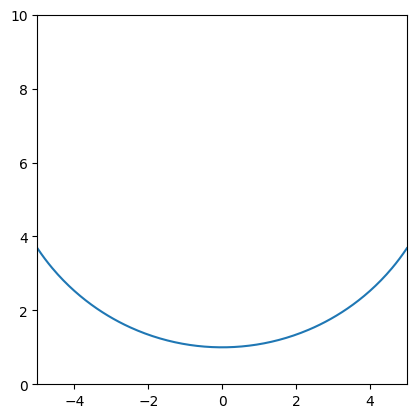

In [132]:
from matplotlib.pyplot import plot, show, xlim, ylim, gca,rcParams
from numpy import linspace, sqrt

#a) set limits to box

xlim(-5,5)
ylim(0,10)

ax = gca()
ax.set_aspect('equal')
#rcParams['figure.figsize'] = [20, 20]

#b) derive and plot f(x)

# x*x + (y-7)*(y-7) = 6*6
# (y-7)*(y-7) = 6*6 - x*x
# abs(y-7) = sqrt(6*6 - x*x)
# pick this branch: y-7 = -sqrt(6*6 - x*x)
def f(x):
    return(7 - sqrt(6*6 - x*x))

# ok, plot mirror surface

N = 200
x = linspace(-5,5,N)
y = f(x)
plot(x,y)

c) Then start a ray at the position (-4,10), and have it travel downwards vertically until it hits the mirror. At what coordinates does this happen? (Note "draw a ray" here really just means draw a line segment from the starting point to the ending point. If you wanted to get really fancy, you could animate the ray as it travels through the system, but we won't bother here. You might want to write a user-defined function that given a starting point, a direction, and a length, draws the required line segment.)


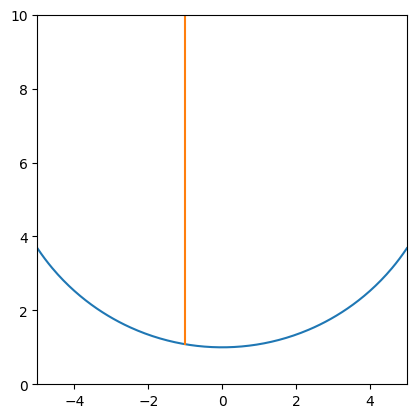

In [133]:
from matplotlib.pyplot import plot, show, xlim, ylim, gca,rcParams
from numpy import linspace, sqrt

#a) set limits to box

xlim(-5,5)
ylim(0,10)

ax = gca()
ax.set_aspect('equal')
#rcParams['figure.figsize'] = [20, 20]

#b) derive and plot f(x)

# x*x + (y-7)*(y-7) = 6*6
# (y-7)*(y-7) = 6*6 - x*x
# abs(y-7) = sqrt(6*6 - x*x)
# pick this branch: y-7 = -sqrt(6*6 - x*x)
def f(x):
    return(7 - sqrt(6*6 - x*x))

# ok, plot mirror surface

N = 200
x = linspace(-5,5,N)
y = f(x)
plot(x,y)

#c) draw incident ray

def plotseg_pts(x0,y0,x1,y1):
    xs = []
    ys = []
    xs.append(x0)
    xs.append(x1)
    ys.append(y0)
    ys.append(y1)
    plot(xs,ys)
    #return(xs,ys)

def plotseg_vec(x0,y0,dx,dy,mult):
    xs = []
    ys = []
    xs.append(x0)
    xs.append(x0+mult*dx)
    ys.append(y0)
    ys.append(y0+mult*dy)
    plot(xs,ys)
    #return(xs,ys)

# starting at (-4, 10) ending at (-4, f(-4) = 7 - sqrt(20) = 2.527)

xv = -1

#
plotseg_pts(xv,10,xv,f(xv))




d) Once the ray hits the mirror, it should be reflected. The law of (specular) reflection says that the ray will be reflected *around* the normal to the mirror's surface at the reflection point. This means that the component parallel to the normal will be reversed, while the component perpendicular to the normal will remain unchanged. To perform this operation and get the reflected direction vector, you will first need to calculate the *normal vector* to the surface; this is the unit vector perpendicular to the *tangent* vector, which we saw can be calculated as a unit vector with a slope equal to the derivative of the function describing the surface.

e) Once you have the reflected vector, draw the reflected ray for some distance throught the system, say until it intersects the y axis or goes just past it.

f) Then repreat this operation for more downward-going rays, starting from points (-3,10), (-2,10), etc., across to (4,10).

g) Looking at the resulting system, what do you conclude about the abiltiy of spherical mirrors to focus light from infinity?

In [134]:
from numpy import array
class Line:
    # ax + by + c = 0
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c


    def getY(self, x):
        if self.isImproper():
            return x
        else:
            return (-1*self.c - self.a*x)/(self.b)
    # def getYs(self,x)
    def isImproper(self):
        return (self.b == 0)
    
    # def graph(self, x):
    #     if self.isImproper():
    #         y = x 
    #         for i in range(len(x)):
    #             x[i] = -1*self.c
    #         plot(x, y)
    #     else: 
    #         plot(x, self.getY(x))

    def getXY(self, x):
        if self.isImproper():
            tempx = array([-1*self.c for i in range(len(x))])
            return [tempx, x]
    

    def graphLines(self, lines, extras, x, xlims, ylims):
        xlim(xlims[0], xlims[1])
        ylim(ylims[0], ylims[1])
        for line in lines:
            if line.isImproper():
                plot([-1*line.c for i in range(len(x))], x)
            else:
                plot(x, line.getY(x))
        for ex in extras:
            plot(x, ex(x))
        show()
    
    def reflectOverThis(self, inputline, x, y):
        if(not inputline.isImproper()):
            x2 = x + 1
            y2 = inputline.getY(x2)
            x3 = x2+1
            y3 = inputline.getY(x3)

        else:
            x2 = x 
            y2 = y + 1
            x3 = x2
            y3 = y2 + 1

        # print(x2, y2, x3, y3)
        A = self.a
        B = self.b 
        C = self.c

        core = lambda x,  y : (2*A*x + 2*B*y + 2*C)/(A*A + B*B)
        x_2 = x2 - core(x2, y2)*A 
        y_2 = y2 - core(x2, y2)*B 
        x_3 = x3 - core(x3,y3)*A 
        y_3 = y3 - core(x3, y3)*B

        m = (y_2 - y)/(x_2 - x)
        D = -1*m
        E = 1
        F = (D * x_2 + E*y_2)*-1
        res = Line(D, E, F)
        # print(res.getY(0))
        return Line(D, E, F)
    def getNorm(self, x, y):
        if self.isImproper() :
            return Line(0, 1, self.c)
        if(self.b == 0):
            return Line(1, 0, self.c)
        
        res = Line(self.b, -1*self.a, 0)
        # y = self.getY(0)
        # 0 + by +c = 0
        d = -1*(res.a*x + res.b * y)
        res.c = d 
        return res

1 -0.1690308509694205 1.1832159566456308


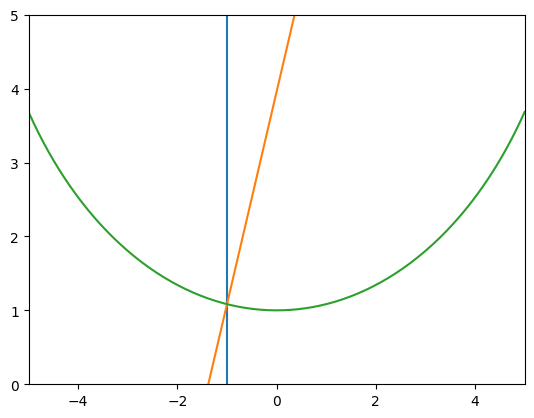

In [135]:
# d)
def dydx(f, x):
    h = 0.0001
    res = (f(x + h) - f(x - h))/(2*h)
    return res

A = -1*dydx(f, xv)
B = 1
C = -1*(A*xv + B*f(xv))
tangent = Line(A,B,C)
norm = tangent.getNorm(xv, f(xv))
ray = Line(1, 0, -1*xv)
refl = tangent.reflectOverThis(ray, xv, f(xv))

lines = [tangent, norm, ray, refl]

# norm = -1/(dydx(f, xv))

# line = lambda x : f(xv) + norm * (x - xv)
print(norm.a, norm.b, norm.c)
# xlim(-2, 2)
# ylim(0,4)
# show()

xlim(-5,5)
ylim(0,10)
x = linspace(-5,5,N)
# tangent.graphLines(lines, [f], x, [-5, 5], [0, 5])
y = f(x)
# plot(x,y)

# norm.graph(x, xv)
# plot(x, tangent.getY(x))
# plotseg_pts(xv,10,xv,f(xv))

# plot(x, line(x))
# plot(x, tangent.getNorm(xv, f(xv)).getY(x))
# show()

# proper graph
lines = [ray, refl]
tangent.graphLines(lines, [f], x, [-5,5], [0,5])

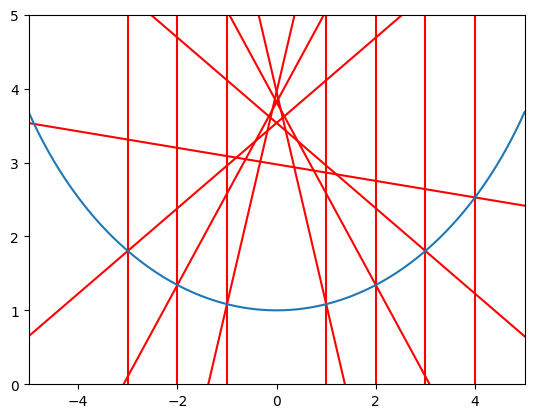

In [136]:
# e)
xlim(-5, 5)
ylim(0, 5)
for i in range(-3, 5, 1):
    if i == 0:
        continue
    A = -1*dydx(f, i)
    B = 1
    C = -1*(A*i + B*f(i))
    tangent = Line(A,B,C)
    norm = tangent.getNorm(i, f(i))
    ray = Line(1, 0, -1*i)
    refl = tangent.reflectOverThis(ray, i, f(i))
    plot(ray.getXY(x)[0],ray.getXY(x)[1], 'r-')
    plot(x, refl.getY(x), 'r-')
    
    
    # plot(x, tangent.getY(x))

plot(x, f(x))
show()

### 2) Modelling Reflection off a Parabolic Mirror

Finally, try the same thing, with a *parabolic* mirror, i.e. one where the equation describing the surface is a quadratic equation of the form $y = ax^2,\ \ a > 0$. Compare the results to question 1.

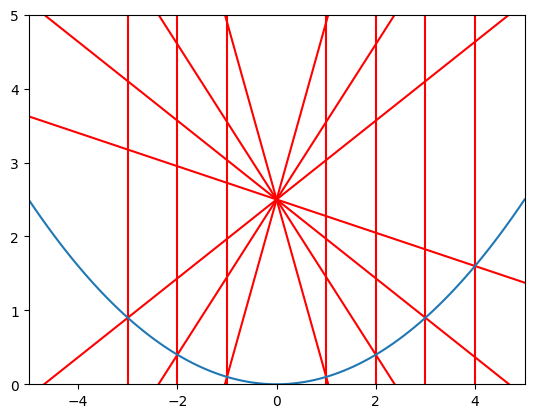

In [139]:
def g(a, x):
    return a*x*x 

a = 0.1

h = lambda x : g(a, x)
xlim(-5, 5)
ylim(0, 5)
for i in range(-3, 5, 1):
    if i == 0:
        continue
    A = -1*dydx(h, i)
    B = 1
    C = -1*(A*i + B*h(i))
    tangent = Line(A,B,C)
    norm = tangent.getNorm(i, h(i))
    ray = Line(1, 0, -1*i)
    refl = tangent.reflectOverThis(ray, i, h(i))
    plot(ray.getXY(x)[0],ray.getXY(x)[1], 'r-')
    plot(x, refl.getY(x), 'r-')
    
    
    # plot(x, tangent.getY(x))

plot(x, h(x))
show()

### 3) Optional - to try if you have time - Modelling Reflection off a Flat Mirror

Now try the same thing, with a flat mirror, i.e. one where the equation describing the surface is a linear equation. Assume a non-zero slope (i.e. a tilted mirror) for clarity. What do you find?

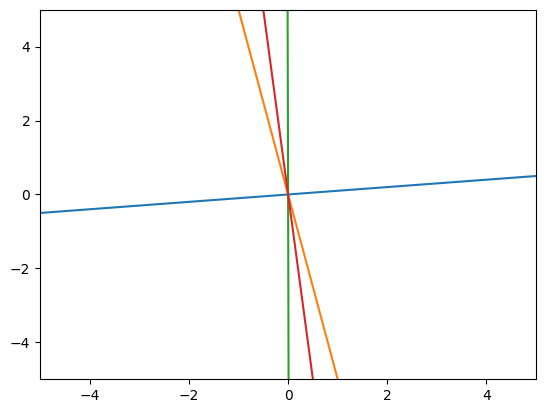

In [138]:

    
# xlim(-5, 5)
# ylim(-5, 5)
line1 = Line(-2, 1, 1)
line2 = Line(1, 1, -2)
line3 = line1.reflectOverThis(line2, 1, 1)
# line3 = reflectOnLine(line1, line2, 1, 1)
norm1 = Line(0.5, 1, -1.5)
x = linspace(-5, 5, 100)
y = line1.getY(x)
# print(y)
# xlim(-5, 5)
# ylim(-5, 5)
# plot(x,  y)
# plot(x, line2.getY(x))
# plot(x, line3.getY(x))
# plot(x, norm1.getY(x))
# plot(1, 1, 'ro')
# show()


xlim(-5, 5)
ylim(-5, 5)
mirror = Line(-1/10, 1, 0)
ray = Line(5, 1, 0)
norm = mirror.getNorm(0, 0)
reflected = mirror.reflectOverThis(ray, 0, 0)
plot(x, mirror.getY(x))
plot(x, ray.getY(x))
plot(x, reflected.getY(x))
plot(x, norm.getY(x))
show()  


# mirror.graphRefl(ray, 0, 0, x)


# def reflectOnLine(refline: Line, inputline: Line, x, y):

#     if(not inputline.isImproper()):
#         x2 = x + 1
#         y2 = inputline.getY(x2)
#         x3 = x2+1
#         y3 = inputline.getY(x3)

#     else:
#         x2 = x 
#         y2 = y + 1
#         x3 = x2
#         y3 = y2 + 1

#     # print(x2, y2, x3, y3)
#     A = refline.a
#     B = refline.b 
#     C = refline.c

#     core = lambda x,  y : (2*A*x + 2*B*y + 2*C)/(A*A + B*B)
#     x_2 = x2 - core(x2, y2)*A 
#     y_2 = y2 - core(x2, y2)*B 
#     x_3 = x3 - core(x3,y3)*A 
#     y_3 = y3 - core(x3, y3)*B

#     xrange = linspace(-5, 5, 100)
#     plot(xrange, refline.getY(xrange))
#     plot(xrange, inputline.getY(xrange))
#     plot(x2, y2, 'ro')
#     plot(x_2, y_2, 'ro')
#     show()

#     m = (y_2 - y)/(x_2 - x)
#     D = -1*m
#     E = 1
#     F = (D * x_2 + E*y_2)*-1
#     res = Line(D, E, F)
#     print(res.getY(0))
#     return Line(D, E, F)



    

### 4) Optional - to try if you have time - The Second Reflection *(Challenging)*

Consider the problem you had previously: in a 2D plane, rays come down from the top of a 10x10 box and strike a parabolic mirror with a surface described by

$$(x,y) = (x,f(y)); \ \ \ f(x) = ax^2 + b\,,$$
with $a = 0.2, b = 1.0$.

After they have reflected once, however, they may then reflect a second time. How would you calculate where they hit the mirror the second time? From there you should be able to draw the second reflected ray.

You can reuse your previous code.


You can play with the code a bit, adding:

    * consistent line colours
    
    * more than one surface! (this is a lot harder...)
    
    * partial reflection